In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 4.2 MB/s eta 0:00:00


In [11]:
import os
import cv2
from ultralytics import YOLO
import shutil
import matplotlib.pyplot as plt

In [7]:
shutil.copytree('/content/drive/MyDrive/Cancer_Cell_Detection/Samples','/content/Samples')
shutil.copytree('/content/drive/MyDrive/Cancer_Cell_Detection/runs','/content/runs')

'/content/runs'

In [8]:
model=YOLO('/content/runs/detect/train/weights/best.pt')


image 1/1 /content/Samples/1703.bmp: 512x640 3 Cancer_Cell_parts, 526.9ms
Speed: 23.1ms preprocess, 526.9ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/Samples/607.bmp: 480x640 3 Cancer_Cell_parts, 248.2ms
Speed: 4.7ms preprocess, 248.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/Samples/505.bmp: 480x640 4 Cancer_Cell_parts, 243.6ms
Speed: 4.7ms preprocess, 243.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/Samples/1710.bmp: 512x640 6 Cancer_Cell_parts, 266.8ms
Speed: 4.9ms preprocess, 266.8ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 640)


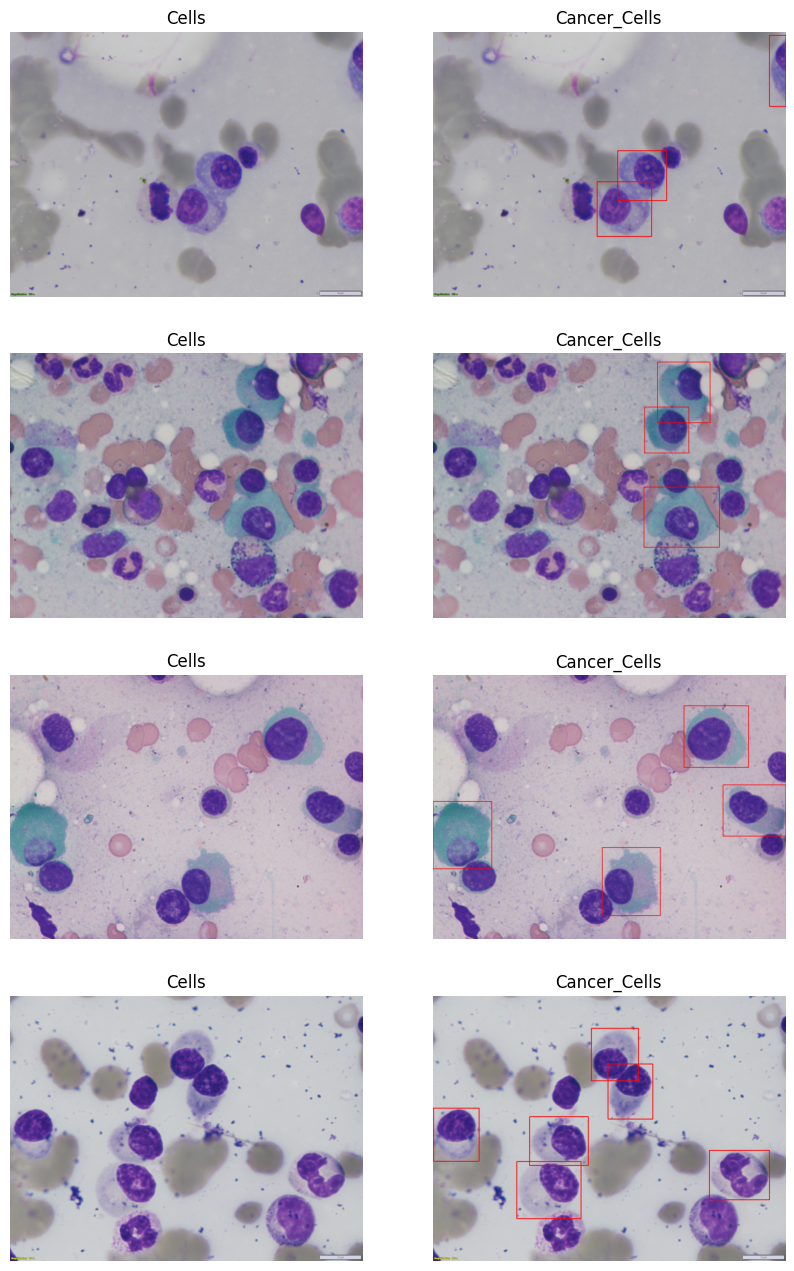

In [30]:
Test_dir='/content/Samples'
rows=len(os.listdir(Test_dir))
fig=plt.figure(figsize=(10,rows*4))
columns=2
i=1
for file in os.listdir(Test_dir):
    file_path=Test_dir+"/"+file
    img=cv2.imread(file_path)
    fig.add_subplot(rows,columns,i).title.set_text("Cells")
    i=i+1
    plt.axis('off')
    plt.imshow(img[:,:,::-1])

    for [x1,y1,x2,y2] in model.predict(file_path)[0].boxes.xyxy:
      x1=int(x1)
      x2=int(x2)
      y1=int(y1)
      y2=int(y2)
      image = cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 4)

    fig.add_subplot(rows,columns,i).title.set_text("Cancer_Cells")
    i=i+1
    plt.axis('off')
    plt.imshow(image[:,:,::-1])
